# 과제2. Mobile 고객 이탈 분석

* 고객 이탈여부(CHURN)에 영향을 주는 요인을 분석하고자 합니다.

![](https://d18lkz4dllo6v2.cloudfront.net/cumulus_uploads/entry/23964/mobile%20phones.png)

## 0.환경설정

### 1) 라이브러리 로딩

In [156]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from statsmodels.graphics.mosaicplot import mosaic
from scipy import stats as spst
import statsmodels.api as sm

### 2) 데이터 로딩

In [157]:
# mobile data
data_path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_NA2.csv"
mobile = pd.read_csv(data_path)
mobile.drop(['id', 'REPORTED_USAGE_LEVEL','OVER_15MINS_CALLS_PER_MONTH'], axis = 1, inplace = True)
mobile.head()

COLLEGE  INCOME  OVERAGE  LEFTOVER     HOUSE  HANDSET_PRICE  \
0        1   47711      183        17  730589.0            192   
1        0   74132      191        43  535092.0            349   
2        1  150419        0        14  204004.0            682   
3        0  159567        0        58  281969.0            634   
4        1   23392        0         0  216707.0            233   

   AVERAGE_CALL_DURATION REPORTED_SATISFACTION CONSIDERING_CHANGE_OF_PLAN  \
0                      5                 unsat                considering   
1                      2                 unsat                         no   
2                      6                 unsat                considering   
3                      1            very_unsat              never_thought   
4                     15                 unsat                         no   

   CHURN  
0      0  
1      1  
2      0  
3      0  
4      1

|변수 명|내용|구분|
|	----	|	----	|	----	|
|	COLLEGE	|	대학졸업 여부(1,0)	|feature		|
|	INCOME	|	연 수입액(달러)	|feature		|
|	OVERAGE	|	월 초과사용 시간(분)	|feature		|
|	LEFTOVER	|	월 사용 잔여시간(분)	|feature		|
|	HOUSE	|	집 가격(달러)	|feature		|
|	HANDSET_PRICE	|	핸드폰 가격(달러)	|feature		|
|	AVERAGE_CALL_DURATION	|	평균 통화시간(분)	|feature		|
|	REPORTED_SATISFACTION	|	만족도 설문('very_unsat', 'unsat', 'avg', 'sat', 'very_sat' )	|feature		|
|	CONSIDERING_CHANGE_OF_PLAN	|	변경 계획 설문('never_thought', 'no', 'perhaps', 'considering',   'actively_looking_into_it')	|feature		|
|	**CHURN**	|	**이탈여부(1 : 이탈, 0 : 잔류)**	|	**Target**	|


----

## 1.가설수립

* 여기서는 가설을 간략히 수립합니다.
    * 숫자형, 범주형 각각 최소 2개 이상씩, 전체 5개의 feature를 도출, 가설을 수립하시오.

* 가설1 : 만족도 설문이 이탈여부에 영향을 미칠 것이다.

* 가설2 : 변경 계획 설문이 이탈여부에 영향을 미칠 것이다.

* 가설3 : 월 초과사용 시간(분)이 이탈여부에 영향을 미칠 것이다.

* 가설4 : 평균 통화시간(분)이 이탈여부에 영향을 미칠 것이다.

* 가설5 : 월 사용 잔여시간(분)이 이탈여부에 영향을 미칠 것이다.

----

## 2.단변량 분석

① 변수의 비즈니스 의미  

② 숫자? 범주?  

③ NaN 존재 여부 및 조치 방안  

④ 기초통계량  

⑤ 분포  

⑥ 위 정보로부터 파악한 내용(비즈니스!) 정리  

⑦ 추가 분석해볼 사항 도출

### 1) feature1 : REPORTED_SATISFACTION

> REPORTED_SATISFACTION : 만족도 설문

① 변수의 비즈니스 의미

> 만족도 설문

② 숫자, 범주?

> 범주형

③ NaN 존재 유무

In [158]:
mobile['REPORTED_SATISFACTION'].isnull().sum()

38

In [159]:
mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   COLLEGE                     18000 non-null  int64  
 1   INCOME                      18000 non-null  int64  
 2   OVERAGE                     18000 non-null  int64  
 3   LEFTOVER                    18000 non-null  int64  
 4   HOUSE                       17785 non-null  float64
 5   HANDSET_PRICE               18000 non-null  int64  
 6   AVERAGE_CALL_DURATION       18000 non-null  int64  
 7   REPORTED_SATISFACTION       17962 non-null  object 
 8   CONSIDERING_CHANGE_OF_PLAN  18000 non-null  object 
 9   CHURN                       18000 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 1.4+ MB


④ 기초통계량(수치화)

In [160]:
mobile['REPORTED_SATISFACTION'].value_counts()

very_unsat    7072
very_sat      4562
unsat         3590
avg           1806
sat            932
Name: REPORTED_SATISFACTION, dtype: int64

⑤ 분포 확인(시각화)

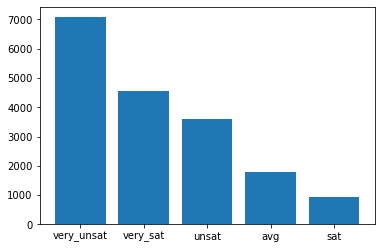

In [161]:
a = mobile['REPORTED_SATISFACTION'].value_counts()

plt.bar(a.index, a.values)
plt.show()

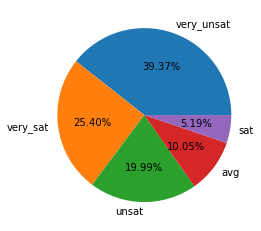

In [162]:
plt.pie(a.values, labels=a.index, autopct='%.2f%%')
plt.show()

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> - 매우 불만이 가장 많은 것으로 보아 많은 이탈이 예상이 된다.  
> - 매우 만족과 매우 불만이 양극화 되어 있다.

⑦ 추가 분석해 볼 사항이 있나요?

### 2) feature2 : CONSIDERING_CHANGE_OF_PLAN

In [163]:
mobile.head(3)

COLLEGE  INCOME  OVERAGE  LEFTOVER     HOUSE  HANDSET_PRICE  \
0        1   47711      183        17  730589.0            192   
1        0   74132      191        43  535092.0            349   
2        1  150419        0        14  204004.0            682   

   AVERAGE_CALL_DURATION REPORTED_SATISFACTION CONSIDERING_CHANGE_OF_PLAN  \
0                      5                 unsat                considering   
1                      2                 unsat                         no   
2                      6                 unsat                considering   

   CHURN  
0      0  
1      1  
2      0

① 변수의 비즈니스 의미

> 변경 계획 설문

② 숫자, 범주?

> 범주형

③ NaN 존재 유무

In [164]:
mobile['CONSIDERING_CHANGE_OF_PLAN'].isnull().sum()

0

④ 기초통계량(수치화)

In [165]:
b = mobile['CONSIDERING_CHANGE_OF_PLAN'].value_counts()
b

considering                 7141
actively_looking_into_it    4453
no                          3644
never_thought               1804
perhaps                      958
Name: CONSIDERING_CHANGE_OF_PLAN, dtype: int64

⑤ 분포 확인(시각화)

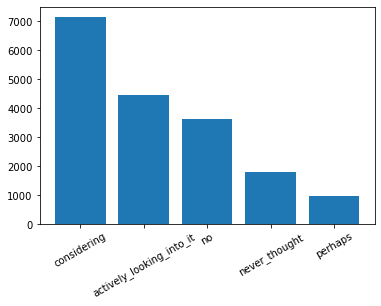

In [166]:
plt.bar(b.index,b.values)
plt.xticks(rotation=30)
plt.show()

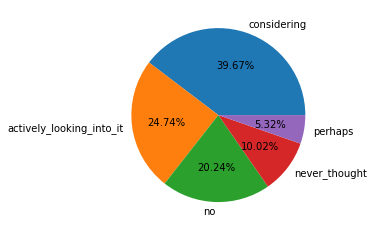

In [167]:
plt.pie(b.values, labels=b.index, autopct='%.2f%%')
plt.show()

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> - 이탈을 고려하는 사람이 매우 많다.  
> - 요금제의 정책 문제가 있을 수 있다.

⑦ 추가 분석해 볼 사항이 있나요?

### 3) feature3 : OVERAGE

In [168]:
mobile.head(3)

COLLEGE  INCOME  OVERAGE  LEFTOVER     HOUSE  HANDSET_PRICE  \
0        1   47711      183        17  730589.0            192   
1        0   74132      191        43  535092.0            349   
2        1  150419        0        14  204004.0            682   

   AVERAGE_CALL_DURATION REPORTED_SATISFACTION CONSIDERING_CHANGE_OF_PLAN  \
0                      5                 unsat                considering   
1                      2                 unsat                         no   
2                      6                 unsat                considering   

   CHURN  
0      0  
1      1  
2      0

① 변수의 비즈니스 의미

> 월 초과사용 시간(분)

② 숫자, 범주?

> 숫자형

③ NaN 존재 유무

In [169]:
mobile['OVERAGE'].isnull().sum()

0

④ 기초통계량(수치화)

In [171]:
mobile['OVERAGE'].describe()

count    18000.000000
mean        86.014833
std         85.963981
min         -2.000000
25%          0.000000
50%         59.000000
75%        179.000000
max        335.000000
Name: OVERAGE, dtype: float64

⑤ 분포 확인(시각화)

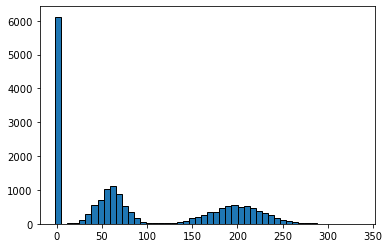

In [172]:
plt.hist(data=mobile, x='OVERAGE', bins=50, edgecolor='k')
plt.show()

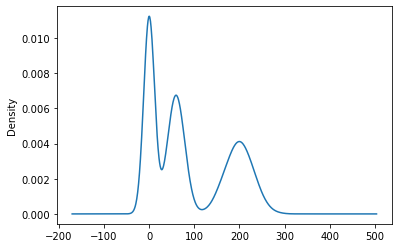

In [173]:
mobile['OVERAGE'].plot(kind='kde')
plt.show()

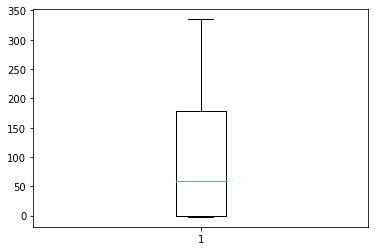

In [174]:
plt.boxplot(data=mobile, x='OVERAGE')
plt.show()

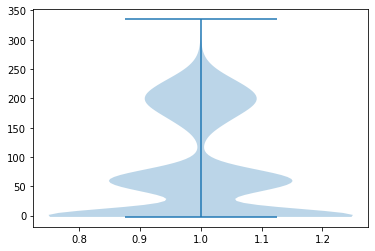

In [175]:
plt.violinplot(mobile['OVERAGE'])
plt.show()

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> - 음수가 존재하고, 0의 수가 대략 25% 차지하는 것으로 많이 존재한다.  
> - 2가지 집단이 존재한다.

⑦ 추가 분석해 볼 사항이 있나요?

> 2집단을 나눠 분석해볼만 하다.

### 4) feature4 : AVERAGE_CALL_DURATION	

In [176]:
mobile.head(3)

COLLEGE  INCOME  OVERAGE  LEFTOVER     HOUSE  HANDSET_PRICE  \
0        1   47711      183        17  730589.0            192   
1        0   74132      191        43  535092.0            349   
2        1  150419        0        14  204004.0            682   

   AVERAGE_CALL_DURATION REPORTED_SATISFACTION CONSIDERING_CHANGE_OF_PLAN  \
0                      5                 unsat                considering   
1                      2                 unsat                         no   
2                      6                 unsat                considering   

   CHURN  
0      0  
1      1  
2      0

① 변수의 비즈니스 의미

> 평균 통화시간(분)

② 숫자, 범주?

> 숫자형

③ NaN 존재 유무

In [177]:
mobile['AVERAGE_CALL_DURATION'].isnull().sum()

0

④ 기초통계량(수치화)

In [178]:
mobile['AVERAGE_CALL_DURATION'].describe()

count    18000.000000
mean         5.990944
std          4.398894
min          1.000000
25%          2.000000
50%          5.000000
75%         10.000000
max         15.000000
Name: AVERAGE_CALL_DURATION, dtype: float64

⑤ 분포 확인(시각화)

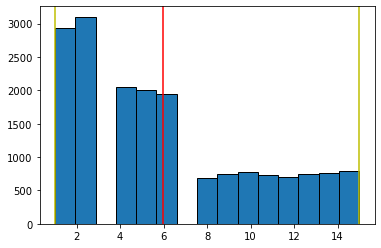

In [309]:
plt.hist(data=mobile, x='AVERAGE_CALL_DURATION', bins=15, edgecolor='k')

plt.axvline(mobile['AVERAGE_CALL_DURATION'].min(), color='y')
plt.axvline(mobile['AVERAGE_CALL_DURATION'].mean(), color='r')
plt.axvline(mobile['AVERAGE_CALL_DURATION'].max(), color='y')

plt.show()

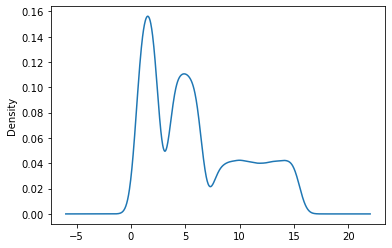

In [180]:
mobile['AVERAGE_CALL_DURATION'].plot(kind='kde')
plt.show()

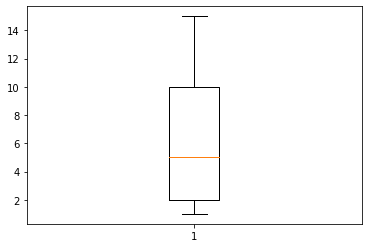

In [181]:
plt.boxplot(data=mobile,x='AVERAGE_CALL_DURATION')
plt.show()

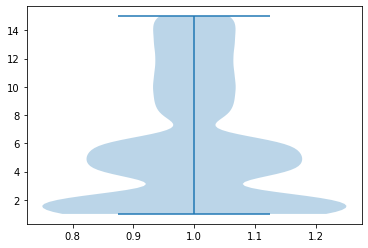

In [182]:
plt.violinplot(mobile['AVERAGE_CALL_DURATION'])
plt.show()

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> - 세가지 집단이 존재한다.  

⑦ 추가 분석해 볼 사항이 있나요?

> 통화 평균별 3집단으로 나누어 분석해볼만 하다.

### 5) feature5 : LEFTOVER

In [183]:
mobile.head(3)

COLLEGE  INCOME  OVERAGE  LEFTOVER     HOUSE  HANDSET_PRICE  \
0        1   47711      183        17  730589.0            192   
1        0   74132      191        43  535092.0            349   
2        1  150419        0        14  204004.0            682   

   AVERAGE_CALL_DURATION REPORTED_SATISFACTION CONSIDERING_CHANGE_OF_PLAN  \
0                      5                 unsat                considering   
1                      2                 unsat                         no   
2                      6                 unsat                considering   

   CHURN  
0      0  
1      1  
2      0

① 변수의 비즈니스 의미

> 월 사용 잔여시간(분)

② 숫자, 범주?

> 숫자형

③ NaN 존재 유무

In [184]:
mobile['LEFTOVER'].isnull().sum()

0

④ 기초통계량(수치화)

In [185]:
mobile['LEFTOVER'].describe()

count    18000.000000
mean        23.995500
std         26.860363
min          0.000000
25%          0.000000
50%         14.500000
75%         42.000000
max         89.000000
Name: LEFTOVER, dtype: float64

⑤ 분포 확인(시각화)

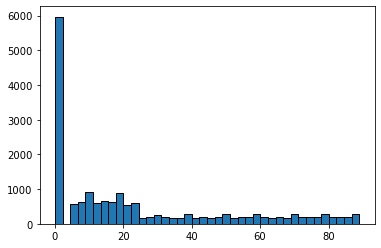

In [186]:
plt.hist(data=mobile, x='LEFTOVER', bins=40, edgecolor='k')
plt.show()

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

> - 0이 대략 25% 차지할 만큼 많이 분포한다.  
> - 약 25분 이상부터 규칙적으로 분포한다.  
> - 0제외, 10~20분에 많이 분포한다.

⑦ 추가 분석해 볼 사항이 있나요?

> 0 제외하고 분포해볼만 하다.

In [187]:
mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   COLLEGE                     18000 non-null  int64  
 1   INCOME                      18000 non-null  int64  
 2   OVERAGE                     18000 non-null  int64  
 3   LEFTOVER                    18000 non-null  int64  
 4   HOUSE                       17785 non-null  float64
 5   HANDSET_PRICE               18000 non-null  int64  
 6   AVERAGE_CALL_DURATION       18000 non-null  int64  
 7   REPORTED_SATISFACTION       17962 non-null  object 
 8   CONSIDERING_CHANGE_OF_PLAN  18000 non-null  object 
 9   CHURN                       18000 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 1.4+ MB


In [188]:
# 결측치 제외
mobile1 = mobile.dropna(axis=0)

In [189]:
mobile.info()

# 약 250개 데이터 드롭

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   COLLEGE                     18000 non-null  int64  
 1   INCOME                      18000 non-null  int64  
 2   OVERAGE                     18000 non-null  int64  
 3   LEFTOVER                    18000 non-null  int64  
 4   HOUSE                       17785 non-null  float64
 5   HANDSET_PRICE               18000 non-null  int64  
 6   AVERAGE_CALL_DURATION       18000 non-null  int64  
 7   REPORTED_SATISFACTION       17962 non-null  object 
 8   CONSIDERING_CHANGE_OF_PLAN  18000 non-null  object 
 9   CHURN                       18000 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 1.4+ MB


In [190]:
mobile1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17747 entries, 0 to 17784
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   COLLEGE                     17747 non-null  int64  
 1   INCOME                      17747 non-null  int64  
 2   OVERAGE                     17747 non-null  int64  
 3   LEFTOVER                    17747 non-null  int64  
 4   HOUSE                       17747 non-null  float64
 5   HANDSET_PRICE               17747 non-null  int64  
 6   AVERAGE_CALL_DURATION       17747 non-null  int64  
 7   REPORTED_SATISFACTION       17747 non-null  object 
 8   CONSIDERING_CHANGE_OF_PLAN  17747 non-null  object 
 9   CHURN                       17747 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 1.5+ MB


### 6) target

① 변수의 비즈니스 의미

② 숫자, 범주?

③ NaN 존재 유무

④ 기초통계량(수치화)

⑤ 분포 확인(시각화)

⑥ 기초통계량과 분포를 통해서 파악한 내용을 적어 봅시다.

보이는 그대로를 넘어, 비즈니스 관점에서 고민하며 적어 봅시다.

⑦ 추가 분석해 볼 사항이 있나요?

## 3.이변량 분석 
* 자료의 종류에 맞게 X --> Y 에 대해서 그래프(시각화)와 가설검정(수치화)를 수행하고 결과를 평가합니다.
* 가설검정시 다음의 항목을 참조하여 수행합니다.
    * 유의수준 : 5%
    * 숫자 --> 숫자 : 상관분석
    * 범주 --> 범주 : 카이제곱검정
    * 범주 --> 숫자 : t검정, 분산분석
    * 숫자 --> 범주 : 로지스틱 회귀모형을 통해, 회귀계수의 P.value로 검정을 수행합니다.

In [191]:
target = 'CHURN'

### (1) 범주형 Feature --> CHURN
* 모든 범주형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 교차표(pd.crosstab())  
    ② 시각화( Stacked Bar, Mosaic)  
    ③ 가설검정(카이제곱검정)
* 각 feature 별로 관계의 정도를 3가지로 정리해봅시다. 

In [192]:
# 전체 이탈율
total_mean = mobile1[target].mean()
print(total_mean)

0.49309742491688735


#### 1) REPORTED_SATISFACTION --> CHURN

In [265]:
mobile['REPORTED_SATISFACTION'].isnull().sum()

38

In [267]:
tmp = mobile[mobile['REPORTED_SATISFACTION'].notnull()]
tmp.info()

# REPORTED_SATISFACTION 의 결측치만 잠시 제거

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17962 entries, 0 to 17999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   COLLEGE                     17962 non-null  int64  
 1   INCOME                      17962 non-null  int64  
 2   OVERAGE                     17962 non-null  int64  
 3   LEFTOVER                    17962 non-null  int64  
 4   HOUSE                       17747 non-null  float64
 5   HANDSET_PRICE               17962 non-null  int64  
 6   AVERAGE_CALL_DURATION       17962 non-null  int64  
 7   REPORTED_SATISFACTION       17962 non-null  object 
 8   CONSIDERING_CHANGE_OF_PLAN  17962 non-null  object 
 9   CHURN                       17962 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 1.5+ MB


In [268]:
feature = 'REPORTED_SATISFACTION'

① 교차표(pd.crosstab())

In [277]:
tab = pd.crosstab(tmp[feature], tmp[target])
tab

CHURN                     0     1
REPORTED_SATISFACTION            
avg                     952   854
sat                     492   440
unsat                  1792  1798
very_sat               2334  2228
very_unsat             3543  3529

② 시각화( Stacked Bar, Mosaic)

In [278]:
table = pd.crosstab(tmp[feature], tmp[target], normalize='index')
table

CHURN                         0         1
REPORTED_SATISFACTION                    
avg                    0.527132  0.472868
sat                    0.527897  0.472103
unsat                  0.499164  0.500836
very_sat               0.511618  0.488382
very_unsat             0.500990  0.499010

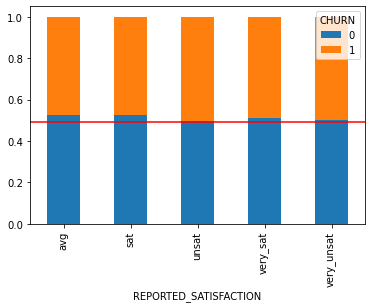

In [279]:
table.plot.bar(stacked=True)
plt.axhline(total_mean, color='r')
plt.show()

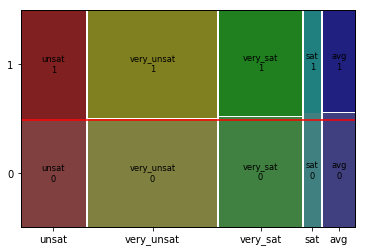

In [280]:
mosaic(mobile1,[feature,target])
plt.axhline(total_mean, color='r')

plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

> - 대부분 평균에 걸쳐있다.  
> - 변화가 없을 것으로 예상.

③ 가설검정(카이제곱검정)

In [281]:
result = spst.chi2_contingency(tab)

print('카이제곱 값 :', result[0])
print('p-value :', result[1])
print('자유도 :', result[2])
print('기대도수\n', result[3])

카이제곱 값 : 6.841100957205645
p-value : 0.14452738878905058
자유도 : 4
기대도수
 [[ 916.27201871  889.72798129]
 [ 472.84912593  459.15087407]
 [1821.38236277 1768.61763723]
 [2314.5254426  2247.4745574 ]
 [3587.97104999 3484.02895001]]


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

> - 그래프 : 각 분포가 평균에 걸쳐있어 영향을 끼친다 보기 어렵다.  
> - p-value : 0.14453 으로 큰 편이다.

> - 만족도 설문이 이탈여부에 영향을 준다 보기 어렵다.

#### 2) CONSIDERING_CHANGE_OF_PLAN --> CHURN

In [298]:
mobile1.head(3)

# 변경계획설문

COLLEGE  INCOME  OVERAGE  LEFTOVER     HOUSE  HANDSET_PRICE  \
0        1   47711      183        17  730589.0            192   
1        0   74132      191        43  535092.0            349   
2        1  150419        0        14  204004.0            682   

   AVERAGE_CALL_DURATION REPORTED_SATISFACTION CONSIDERING_CHANGE_OF_PLAN  \
0                      5                 unsat                considering   
1                      2                 unsat                         no   
2                      6                 unsat                considering   

   CHURN  
0      0  
1      1  
2      0

In [299]:
feature = 'CONSIDERING_CHANGE_OF_PLAN'

① 교차표(pd.crosstab())

In [300]:
tab = pd.crosstab(mobile[feature], mobile[target])
tab

CHURN                          0     1
CONSIDERING_CHANGE_OF_PLAN            
actively_looking_into_it    2278  2175
considering                 3648  3493
never_thought                926   878
no                          1823  1821
perhaps                      456   502

② 시각화( Stacked Bar, Mosaic)

In [301]:
table = pd.crosstab(mobile[feature], mobile[target], normalize='index')
table

CHURN                              0         1
CONSIDERING_CHANGE_OF_PLAN                    
actively_looking_into_it    0.511565  0.488435
considering                 0.510853  0.489147
never_thought               0.513304  0.486696
no                          0.500274  0.499726
perhaps                     0.475992  0.524008

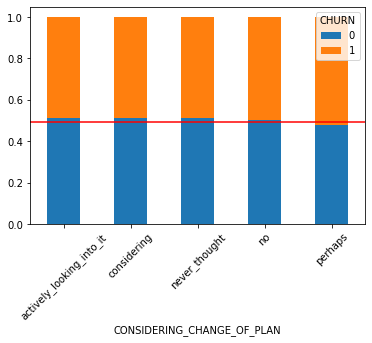

In [302]:
table.plot.bar(stacked=True)
plt.axhline(total_mean, color='r')

plt.xticks(rotation=45)
plt.show()

<Figure size 1152x720 with 0 Axes>

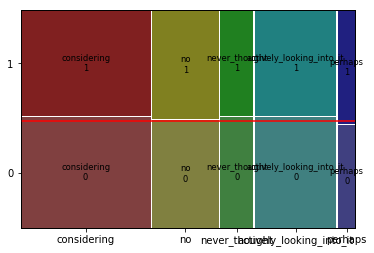

In [303]:
plt.figure(figsize=(16,10))
mosaic(mobile1, [feature, target])
plt.axhline(total_mean, color='r')

plt.xticks(rotation=45)
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

> - 각각이 비교적 평균선에 분포한다.  
> - 영향이 있다고 보기 어렵다.

③ 가설검정(카이제곱검정)

In [304]:
result = spst.chi2_contingency(tab)

print('카이제곱 값 :', result[0])
print('p-value :', result[1])
print('자유도 :', result[2])
print('기대도수\n', result[3])

카이제곱 값 : 5.421434419620688
p-value : 0.24672225866799702
자유도 : 4
기대도수
 [[2258.90794444 2194.09205556]
 [3622.47061111 3518.52938889]
 [ 915.12911111  888.87088889]
 [1848.52022222 1795.47977778]
 [ 485.97211111  472.02788889]]


④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

> - 그래프 : 각각 평균선에 비슷하게 분포한다.  
> - p-value : 0.28337로 큰 편에 속한다.

> - 변경계획설문이 고객 이탈여부에 영향을 준다보기 어렵다.

#### 3) feature --> CHURN

① 교차표(pd.crosstab())

② 시각화( Stacked Bar, Mosaic)

시각화를 통해 파악한 내용을 적어 봅시다.

③ 가설검정(카이제곱검정)

④ 시각화와 가설검정을 통해서 파악한 내용을 적어 봅시다.

### (2) 숫자형 Feature --> CHURN

* 숫자형 Feature에 대해서 Y와 비교하여 차트를 그리고 수치화 하시오.  
    ① 그래프 : histogram, densityplot   
    ② 수치화 : 로지스틱회귀

#### 1) OVERAGE --> CHURN


In [288]:
feature = 'OVERAGE'

In [211]:
mobile1.head(3)

COLLEGE  INCOME  OVERAGE  LEFTOVER     HOUSE  HANDSET_PRICE  \
0        1   47711      183        17  730589.0            192   
1        0   74132      191        43  535092.0            349   
2        1  150419        0        14  204004.0            682   

   AVERAGE_CALL_DURATION REPORTED_SATISFACTION CONSIDERING_CHANGE_OF_PLAN  \
0                      5                 unsat                considering   
1                      2                 unsat                         no   
2                      6                 unsat                considering   

   CHURN  
0      0  
1      1  
2      0

① 그래프 : histogram, densityplot

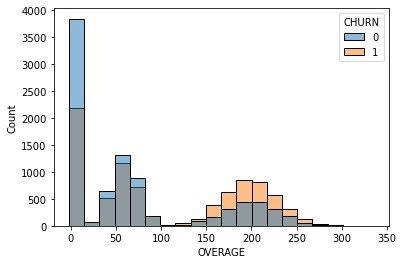

In [289]:
sns.histplot(data=mobile1, x=feature, hue=target, bins=20)
plt.show()

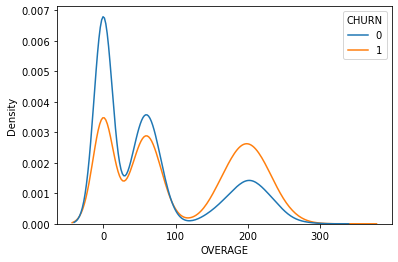

In [213]:
sns.kdeplot(data=mobile1, x=feature, hue=target)
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

> - 그래프에 차이나는 구간이 있다.
> - 약 100에서 교차가 일어난다.
> - 100보다 작을 때 이탈율이 낮고, 100보다 클 때 이탈율이 더 높다.

② 수치화 : 로지스틱회귀

In [215]:
model = sm.Logit(mobile1[target], mobile1[feature])   # y, x 순서 지켜야함.
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.680632
         Iterations 4
OVERAGE    2.805475e-95
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> - 그래프 : 차이나는 구간이 있으나, 증감 추세가 같다. 애매하다.  
> - p-value : 0에 가깝다.

> - p-value 가 0에 가까우므로 영향이 있는 편이다.

#### 2) AVERAGE_CALL_DURATION --> CHURN


In [216]:
feature = 'AVERAGE_CALL_DURATION'

① 그래프 : histogram, densityplot

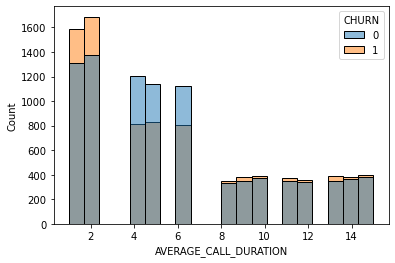

In [218]:
sns.histplot(data=mobile1, x=feature, hue=target, bins=20)
plt.show()

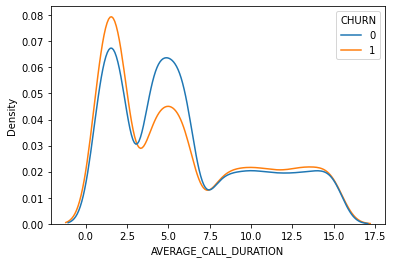

In [219]:
sns.kdeplot(data=mobile1, x=feature, hue=target)
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

> - 그래프에 차이가 있어보이나, 증감 추세가 비슷하다.

> - 약 3, 7.5 에서 교차가 일어난다.
> - 3 이하 : 이탈율이 더 높다.  
> - 3 ~ 7.5 : 이탈율이 더 낮다.
> - 7.5 이상 : 이탈율이 약간 높다.

② 수치화 : 로지스틱회귀

In [221]:
model = sm.Logit(mobile1[target], mobile1[feature])   # y, x 순서 지켜야함.
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.693031
         Iterations 3
AVERAGE_CALL_DURATION    0.042621
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> - 그래프 : 차이가 나는 구간이 있으나, 증감 추세가 비슷하다.
> - p-value : 0.04262 로 0.05보단 작으나 강한 영향을 미친다 보기 어렵다.

> - 평균 통화시간이 고객 이탈여부에 약한 영향을 미칠 수 있다.

#### 3) LEFTOVER --> CHURN


In [222]:
feature = 'LEFTOVER'

① 그래프 : histogram, densityplot

<AxesSubplot:xlabel='LEFTOVER', ylabel='Count'>

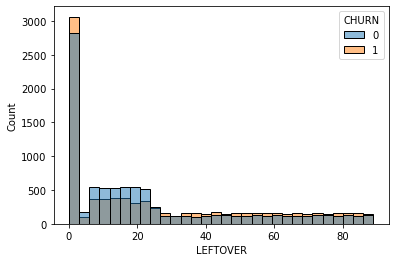

In [223]:
sns.histplot(data=mobile1, x=feature, hue=target, bins=30)

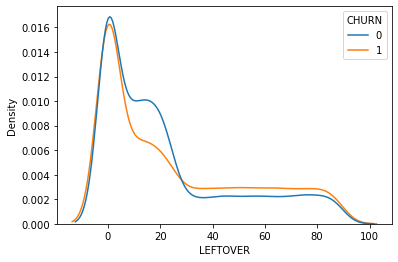

In [224]:
sns.kdeplot(data=mobile1, x=feature, hue=target)
plt.show()

시각화를 통해 파악한 내용을 적어 봅시다.

> 그래프 상 차이가 나는 구간이 발생한다.

② 수치화 : 로지스틱회귀

In [225]:
model = sm.Logit(mobile1[target], mobile1[feature])   # y, x 순서 지켜야함.
result = model.fit()
print(result.pvalues)

Optimization terminated successfully.
         Current function value: 0.692518
         Iterations 3
LEFTOVER    0.000002
dtype: float64


③ 시각화와 수치화를 통해 파악한 내용을 적어 봅시다.

> - 그래프 : 차이가 나는 구간이 발생한다.
> - p-value : 0.000002 로 0에 가깝다.

> - 월 사용 잔여시간이 고객 이탈여부에 영향을 미친다 볼 수 있다.

## 4.관계 정리

### 1) 강한관계의 변수

LEFTOVER, OVERAGE

### 2) 약한관계의 변수

AVERAGE_CALL_DURATION

### 3) 관계 없음

REPORTED_SATISFACTION, CONSIDERING_CHANGE_OF_PLAN

## 5.추가 분석

In [233]:
mobile['OVERAGE'].describe()


count    18000.000000
mean        86.014833
std         85.963981
min         -2.000000
25%          0.000000
50%         59.000000
75%        179.000000
max        335.000000
Name: OVERAGE, dtype: float64

In [282]:
tmp['OVERAGE'].describe()

count    17962.000000
mean        86.019263
std         85.966366
min         -2.000000
25%          0.000000
50%         59.000000
75%        179.000000
max        335.000000
Name: OVERAGE, dtype: float64

In [283]:
mobile_overage = mobile[mobile['OVERAGE']>=0]
mobile_overage.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17999 entries, 0 to 17999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   COLLEGE                     17999 non-null  int64  
 1   INCOME                      17999 non-null  int64  
 2   OVERAGE                     17999 non-null  int64  
 3   LEFTOVER                    17999 non-null  int64  
 4   HOUSE                       17784 non-null  float64
 5   HANDSET_PRICE               17999 non-null  int64  
 6   AVERAGE_CALL_DURATION       17999 non-null  int64  
 7   REPORTED_SATISFACTION       17961 non-null  object 
 8   CONSIDERING_CHANGE_OF_PLAN  17999 non-null  object 
 9   CHURN                       17999 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 1.5+ MB


In [284]:
mobile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   COLLEGE                     18000 non-null  int64  
 1   INCOME                      18000 non-null  int64  
 2   OVERAGE                     18000 non-null  int64  
 3   LEFTOVER                    18000 non-null  int64  
 4   HOUSE                       17785 non-null  float64
 5   HANDSET_PRICE               18000 non-null  int64  
 6   AVERAGE_CALL_DURATION       18000 non-null  int64  
 7   REPORTED_SATISFACTION       17962 non-null  object 
 8   CONSIDERING_CHANGE_OF_PLAN  18000 non-null  object 
 9   CHURN                       18000 non-null  int64  
dtypes: float64(1), int64(7), object(2)
memory usage: 1.4+ MB


In [285]:
mobile[mobile['OVERAGE']==-2]

COLLEGE  INCOME  OVERAGE  LEFTOVER     HOUSE  HANDSET_PRICE  \
3308        0   92956       -2         0  816777.0            274   

      AVERAGE_CALL_DURATION REPORTED_SATISFACTION CONSIDERING_CHANGE_OF_PLAN  \
3308                      2            very_unsat                considering   

      CHURN  
3308      0